In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [32]:
sns.set(style="whitegrid")

In [33]:
train_dir = 'D:/Rice-Leaf-Disease/RiceLeafsDisease/train'
validation_dir = 'D:/Rice-Leaf-Disease/RiceLeafsDisease/val'

In [34]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    horizontal_flip=True
)

In [35]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [36]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 4745 images belonging to 4 classes.


In [37]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 592 images belonging to 4 classes.


In [38]:
train_class_distribution = pd.Series(train_generator.classes).value_counts()
class_names = list(train_generator.class_indices.keys())

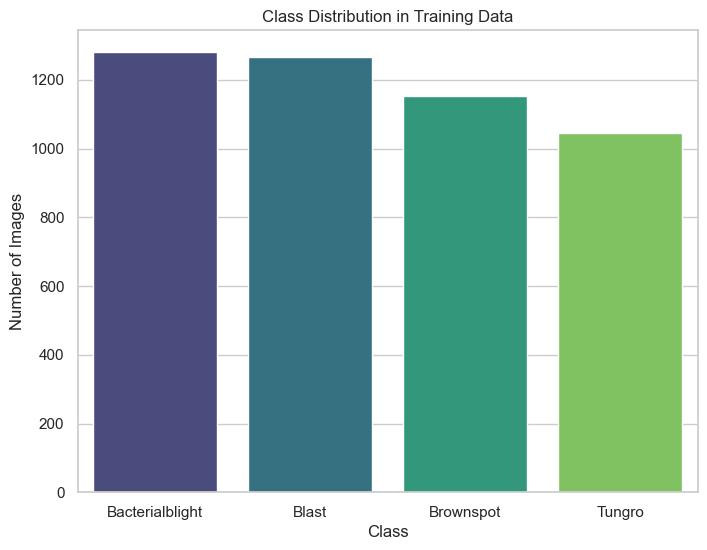

In [39]:
plt.figure(figsize=(8, 6))
sns.barplot(x=class_names, y=train_class_distribution, palette="viridis")
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

In [40]:
model = Sequential()

In [41]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

c:\Users\91709\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

In [43]:
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

In [44]:
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

In [45]:
model.add(Flatten())

In [46]:
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

In [47]:
model.add(Dense(train_generator.num_classes, activation='softmax'))

In [48]:
optimizer = Adam(learning_rate=0.001)

In [49]:
model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [50]:
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=1e-6)

In [51]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [52]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20,  # Increased number of epochs
    callbacks=[lr_reduction, early_stopping]
)

Epoch 1/20


c:\Users\91709\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


148/148 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.6686 - loss: 2.9269 - val_accuracy: 0.2726 - val_loss: 10.6162 - learning_rate: 0.0010
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9062 - loss: 0.2477 - val_accuracy: 0.1875 - val_loss: 12.5856 - learning_rate: 0.0010
Epoch 3/20


c:\Users\91709\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


148/148 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8262 - loss: 0.5499 - val_accuracy: 0.4809 - val_loss: 4.7794 - learning_rate: 0.0010
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - accuracy: 0.7812 - loss: 0.4273 - val_accuracy: 0.5000 - val_loss: 3.9814 - learning_rate: 0.0010
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.8509 - loss: 0.4203 - val_accuracy: 0.7066 - val_loss: 1.3091 - learning_rate: 0.0010
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 756us/step - accuracy: 0.8750 - loss: 0.5519 - val_accuracy: 0.7500 - val_loss: 0.8783 - learning_rate: 0.0010
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.8769 - loss: 0.3491 - val_accuracy: 0.8698 - val_loss: 0.3030 - learning_rate: 0.0010
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step - accuracy: 0.8125 - loss: 0.4627 - val_accuracy: 0.9375 - val_loss: 0.1554 - learning_rate: 0.0010
Epoch 9/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8956 - loss: 0.3335 - v

In [53]:
epochs = range(1, len(history.history['accuracy']) + 1)

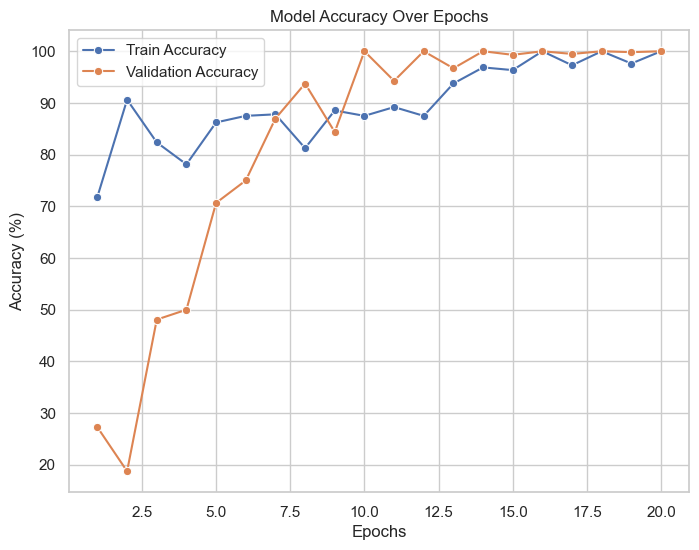

In [54]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=epochs, y=[x * 100 for x in history.history['accuracy']], label='Train Accuracy', marker='o')
sns.lineplot(x=epochs, y=[x * 100 for x in history.history['val_accuracy']], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

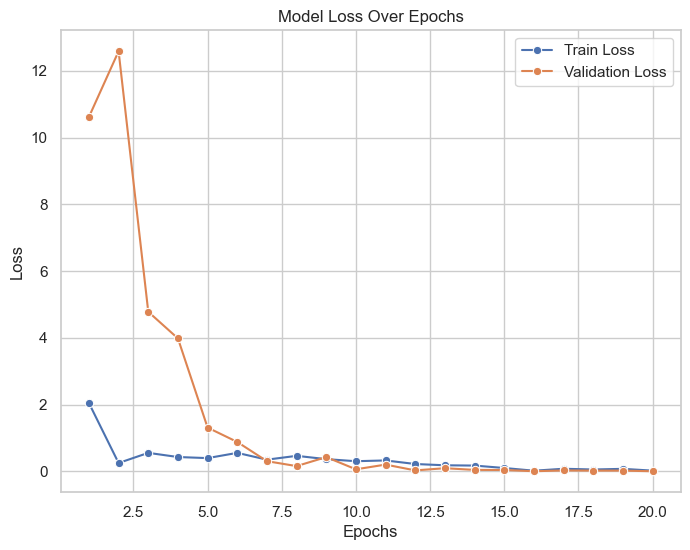

In [55]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=epochs, y=history.history['loss'], label='Train Loss', marker='o')
sns.lineplot(x=epochs, y=history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [56]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Model accuracy: {accuracy * 100:.2f}%")

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - accuracy: 0.9989 - loss: 0.0181
Model accuracy: 99.83%


In [57]:
model.save('advanced_rice_leaf_disease_model.h5')